## Loading required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [3]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## Reading the data

In [4]:
df=pd.read_csv("C:/Users/vamsi/Downloads/project2.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
for i in range(len(df)):
    if df['TotalCharges'][i]==' ':
        df['TotalCharges'][i]=np.NaN

In [8]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [9]:
df.fillna(df.mean(), inplace=True)

In [10]:
df.drop(columns=['customerID'],inplace=True)

In [11]:
col=list(df.columns)
col

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

## Numerical variables

In [12]:
num=['tenure','MonthlyCharges','TotalCharges']

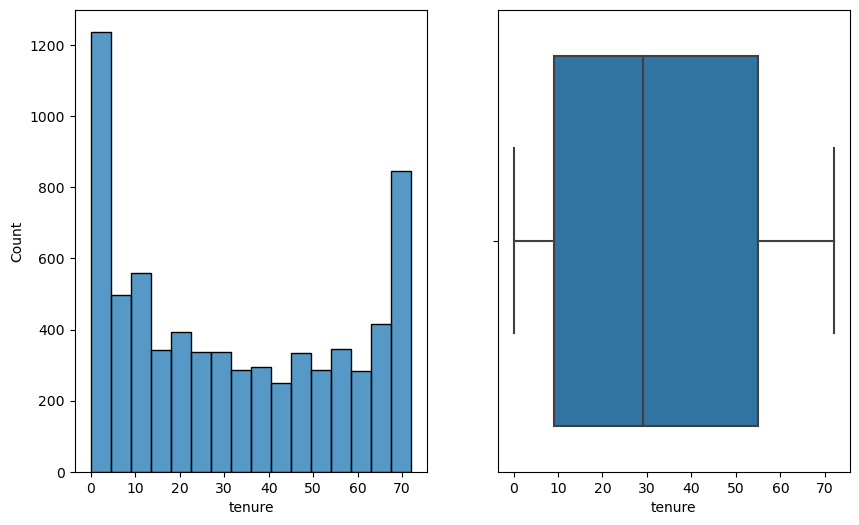

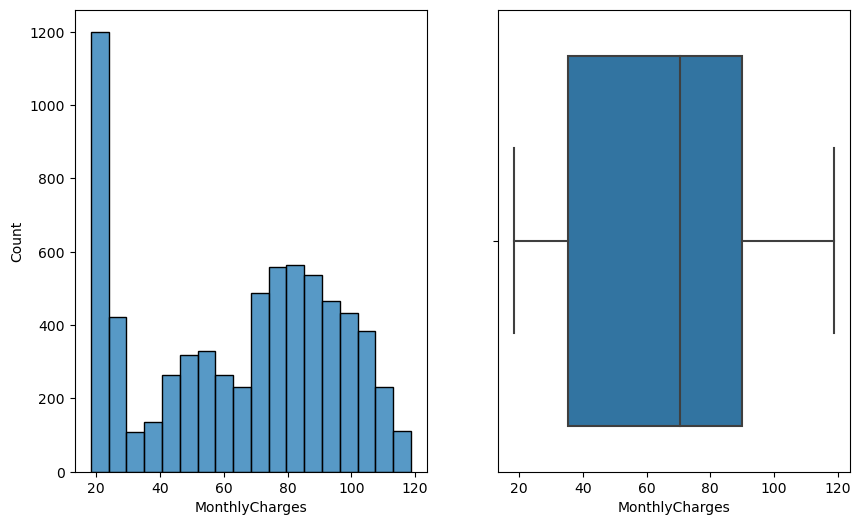

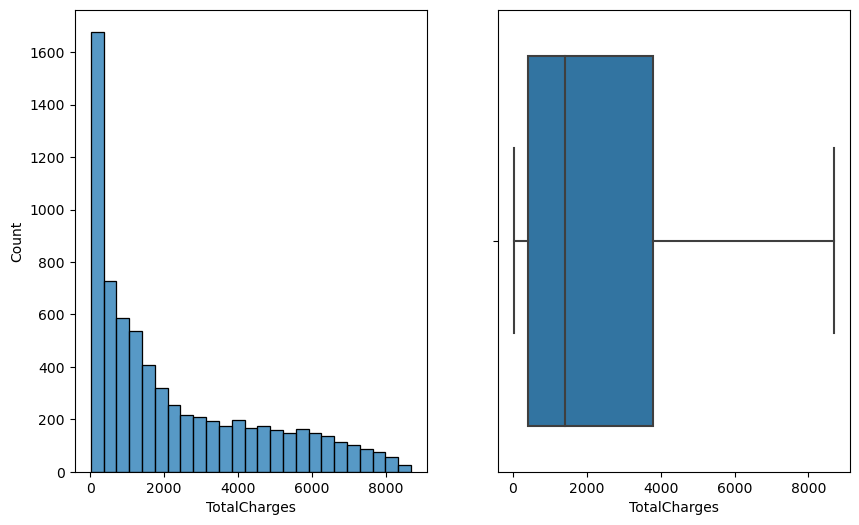

In [13]:
for col1 in num:
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(df[col1])
    plt.subplot(1,2,2)
    sns.boxplot(data=df, x=col1)
    plt.show()

- We see we have many customers who stay less than 10 months in the company. However, they is a small spike in customers who are loyal enough to stay up to 72 months.

- The monthly charges have a right skewed distribution, a huge proportion of customers have around 20−25 monthly charges and less customers have more than 25 dollars.

- The same pattern appears in TotalCharges. There is a huge majority of TotalCharges range between 0 to 2000 dollars and a smaller amounts of total charges above 2000 doll

- All the numerical features have a right skewed distribution.

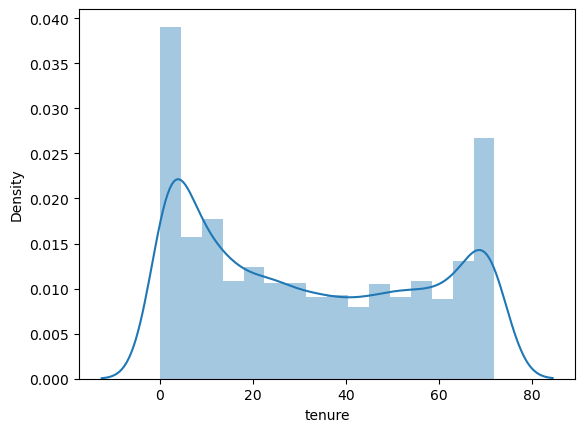

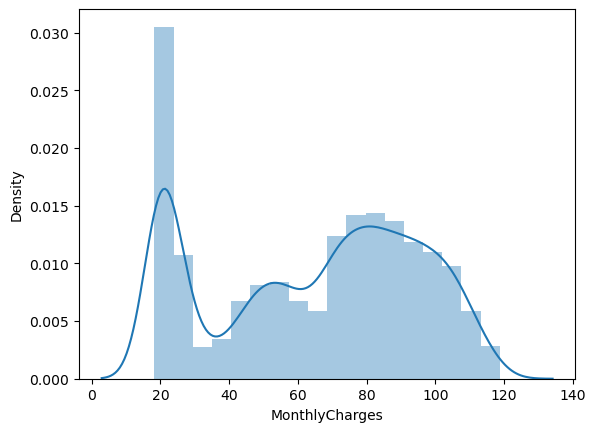

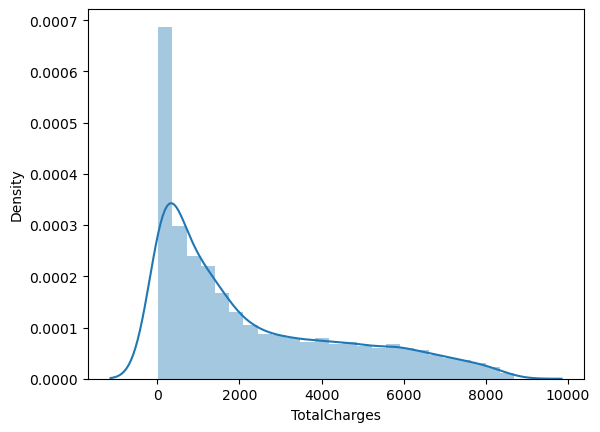

In [14]:
for col1 in num:
    sns.distplot(df[col1])
    plt.show()

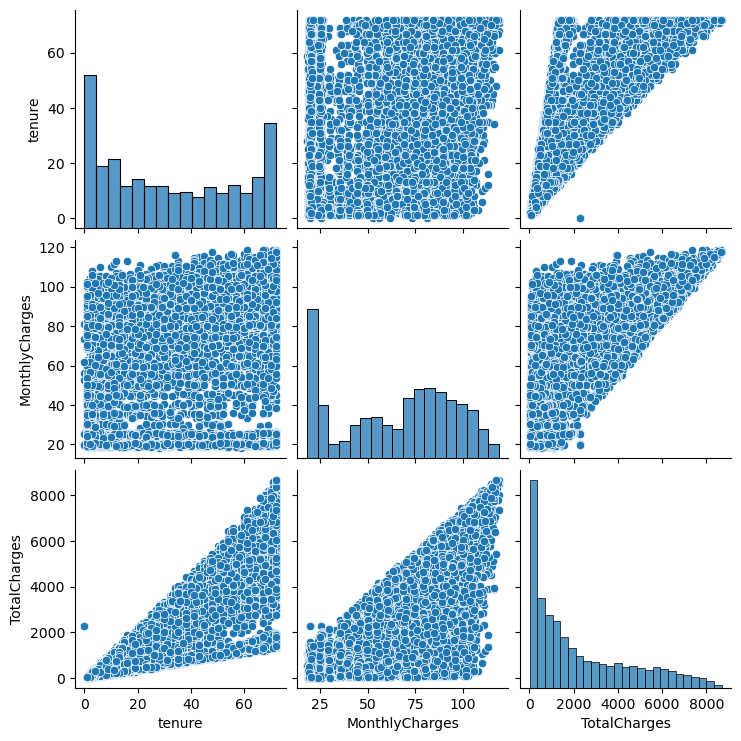

In [15]:
sns.pairplot(df[num])
plt.show()

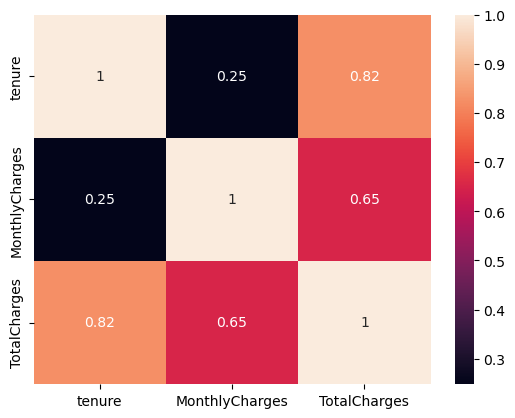

In [16]:
sns.heatmap(df[num].corr(method='pearson'), annot=True)
plt.show()

## Categorical Variables

In [17]:
cat=['gender','SeniorCitizen','Partner','Dependents','PhoneService',
     'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
     'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
     'Contract','PaperlessBilling','PaymentMethod']

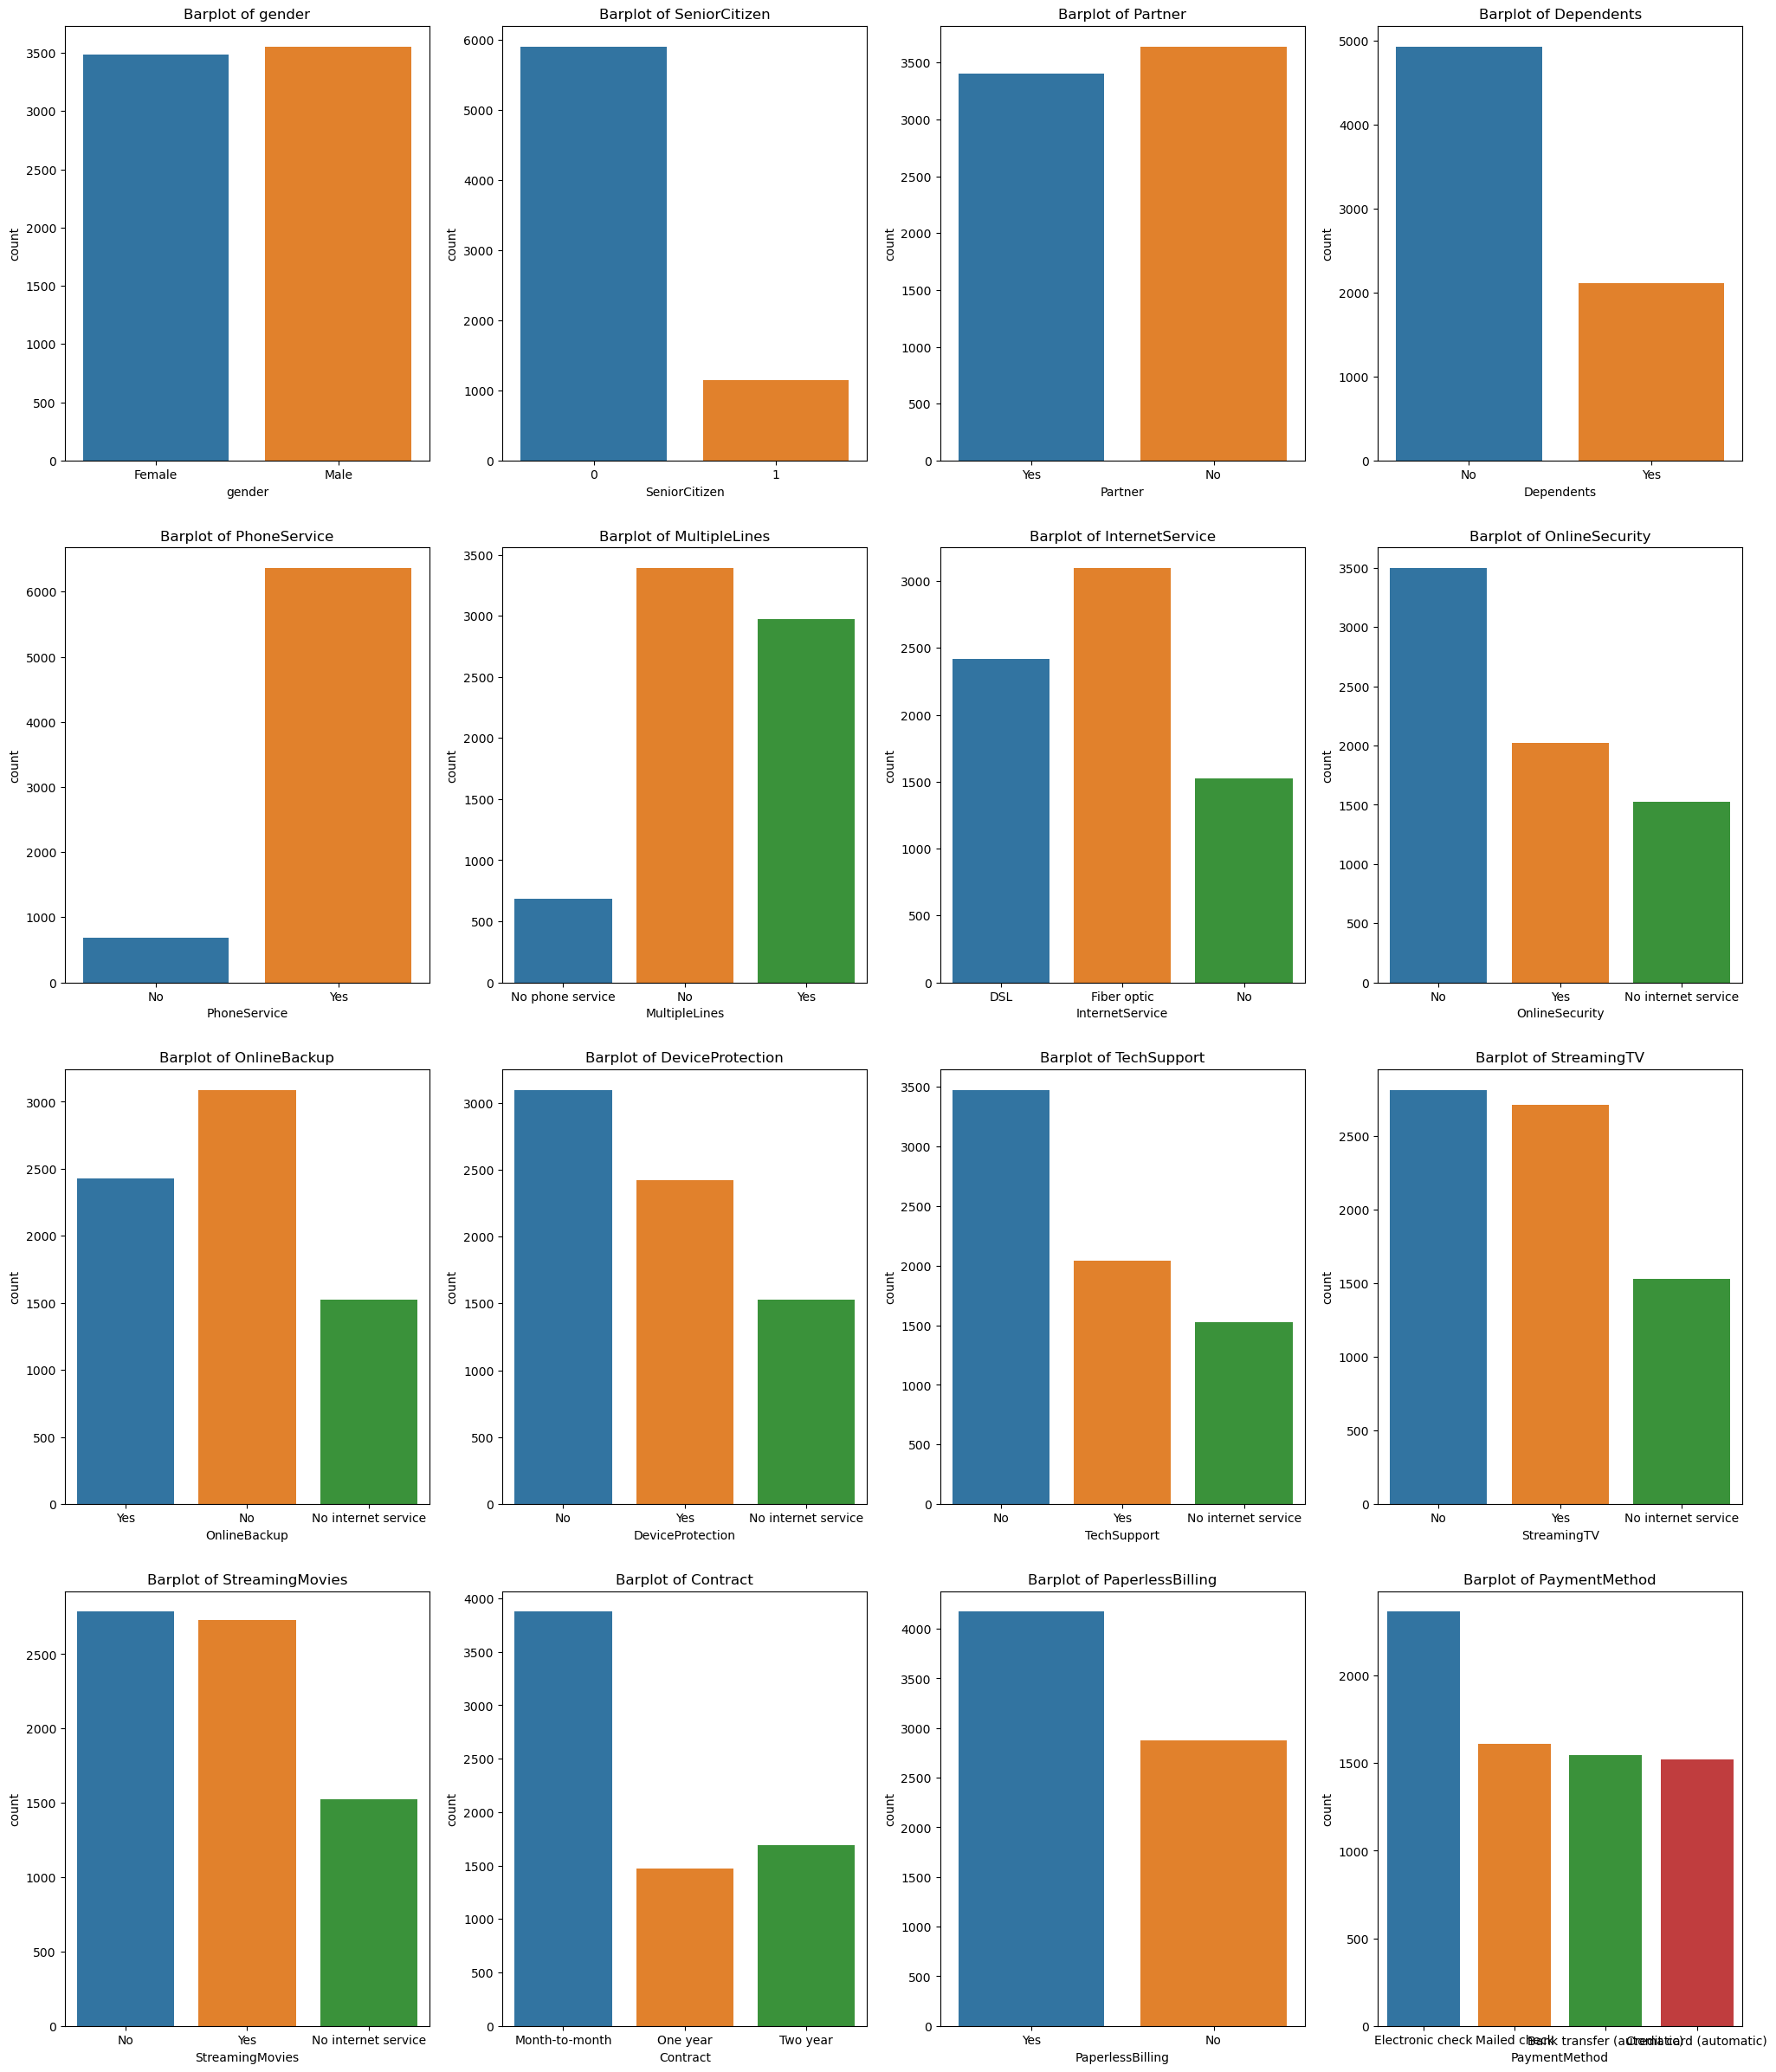

In [18]:
count=1
plt.subplots(figsize=(25,30))
for col in cat:
    plt.subplot(4,4,count)
    sns.countplot(df[col])
    plt.title('Barplot of '+col)
    count=count+1
plt.show()

- Genders, seems we have equal number of both males and females.


- We have young customers compared to senior.


- Customers with or without partners are about the same.


- Seems we have more customers without dependent members than those who have.


- Also the majority of customers who don't have a phone service are way more than those who have.


- Customers who have internet service, prefer mostly DSL or Fiber optic.


- There is a common pattern in the features MultipleLines, InternetService, OnlineSecurity, OnlineBackup, TechSupport. It is illustated that most of the customers prefer not to have access to these features than those who have.


- The features, StreamingMovies and StreamingTV has similar barplots, which means there is an equal amount of customers who prefer to either prefer these services or not to.


- In general customers prefer month-to-month contracts wcompared to other types such as two year or one year contracts.


- Finally, most customers would rather have Paperless billing than any other form and seems they use all the different forms of banking transactions such with Electronic Check being the majority.

## Target Variable

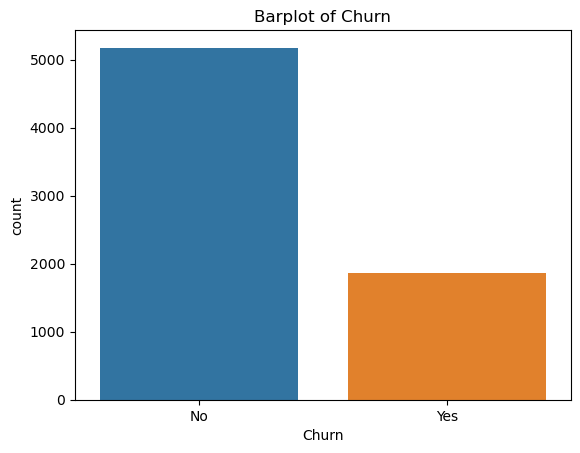

In [19]:
sns.countplot(df['Churn'])
plt.title('Barplot of Churn')
plt.show()

## Target Vs Categorical Variables

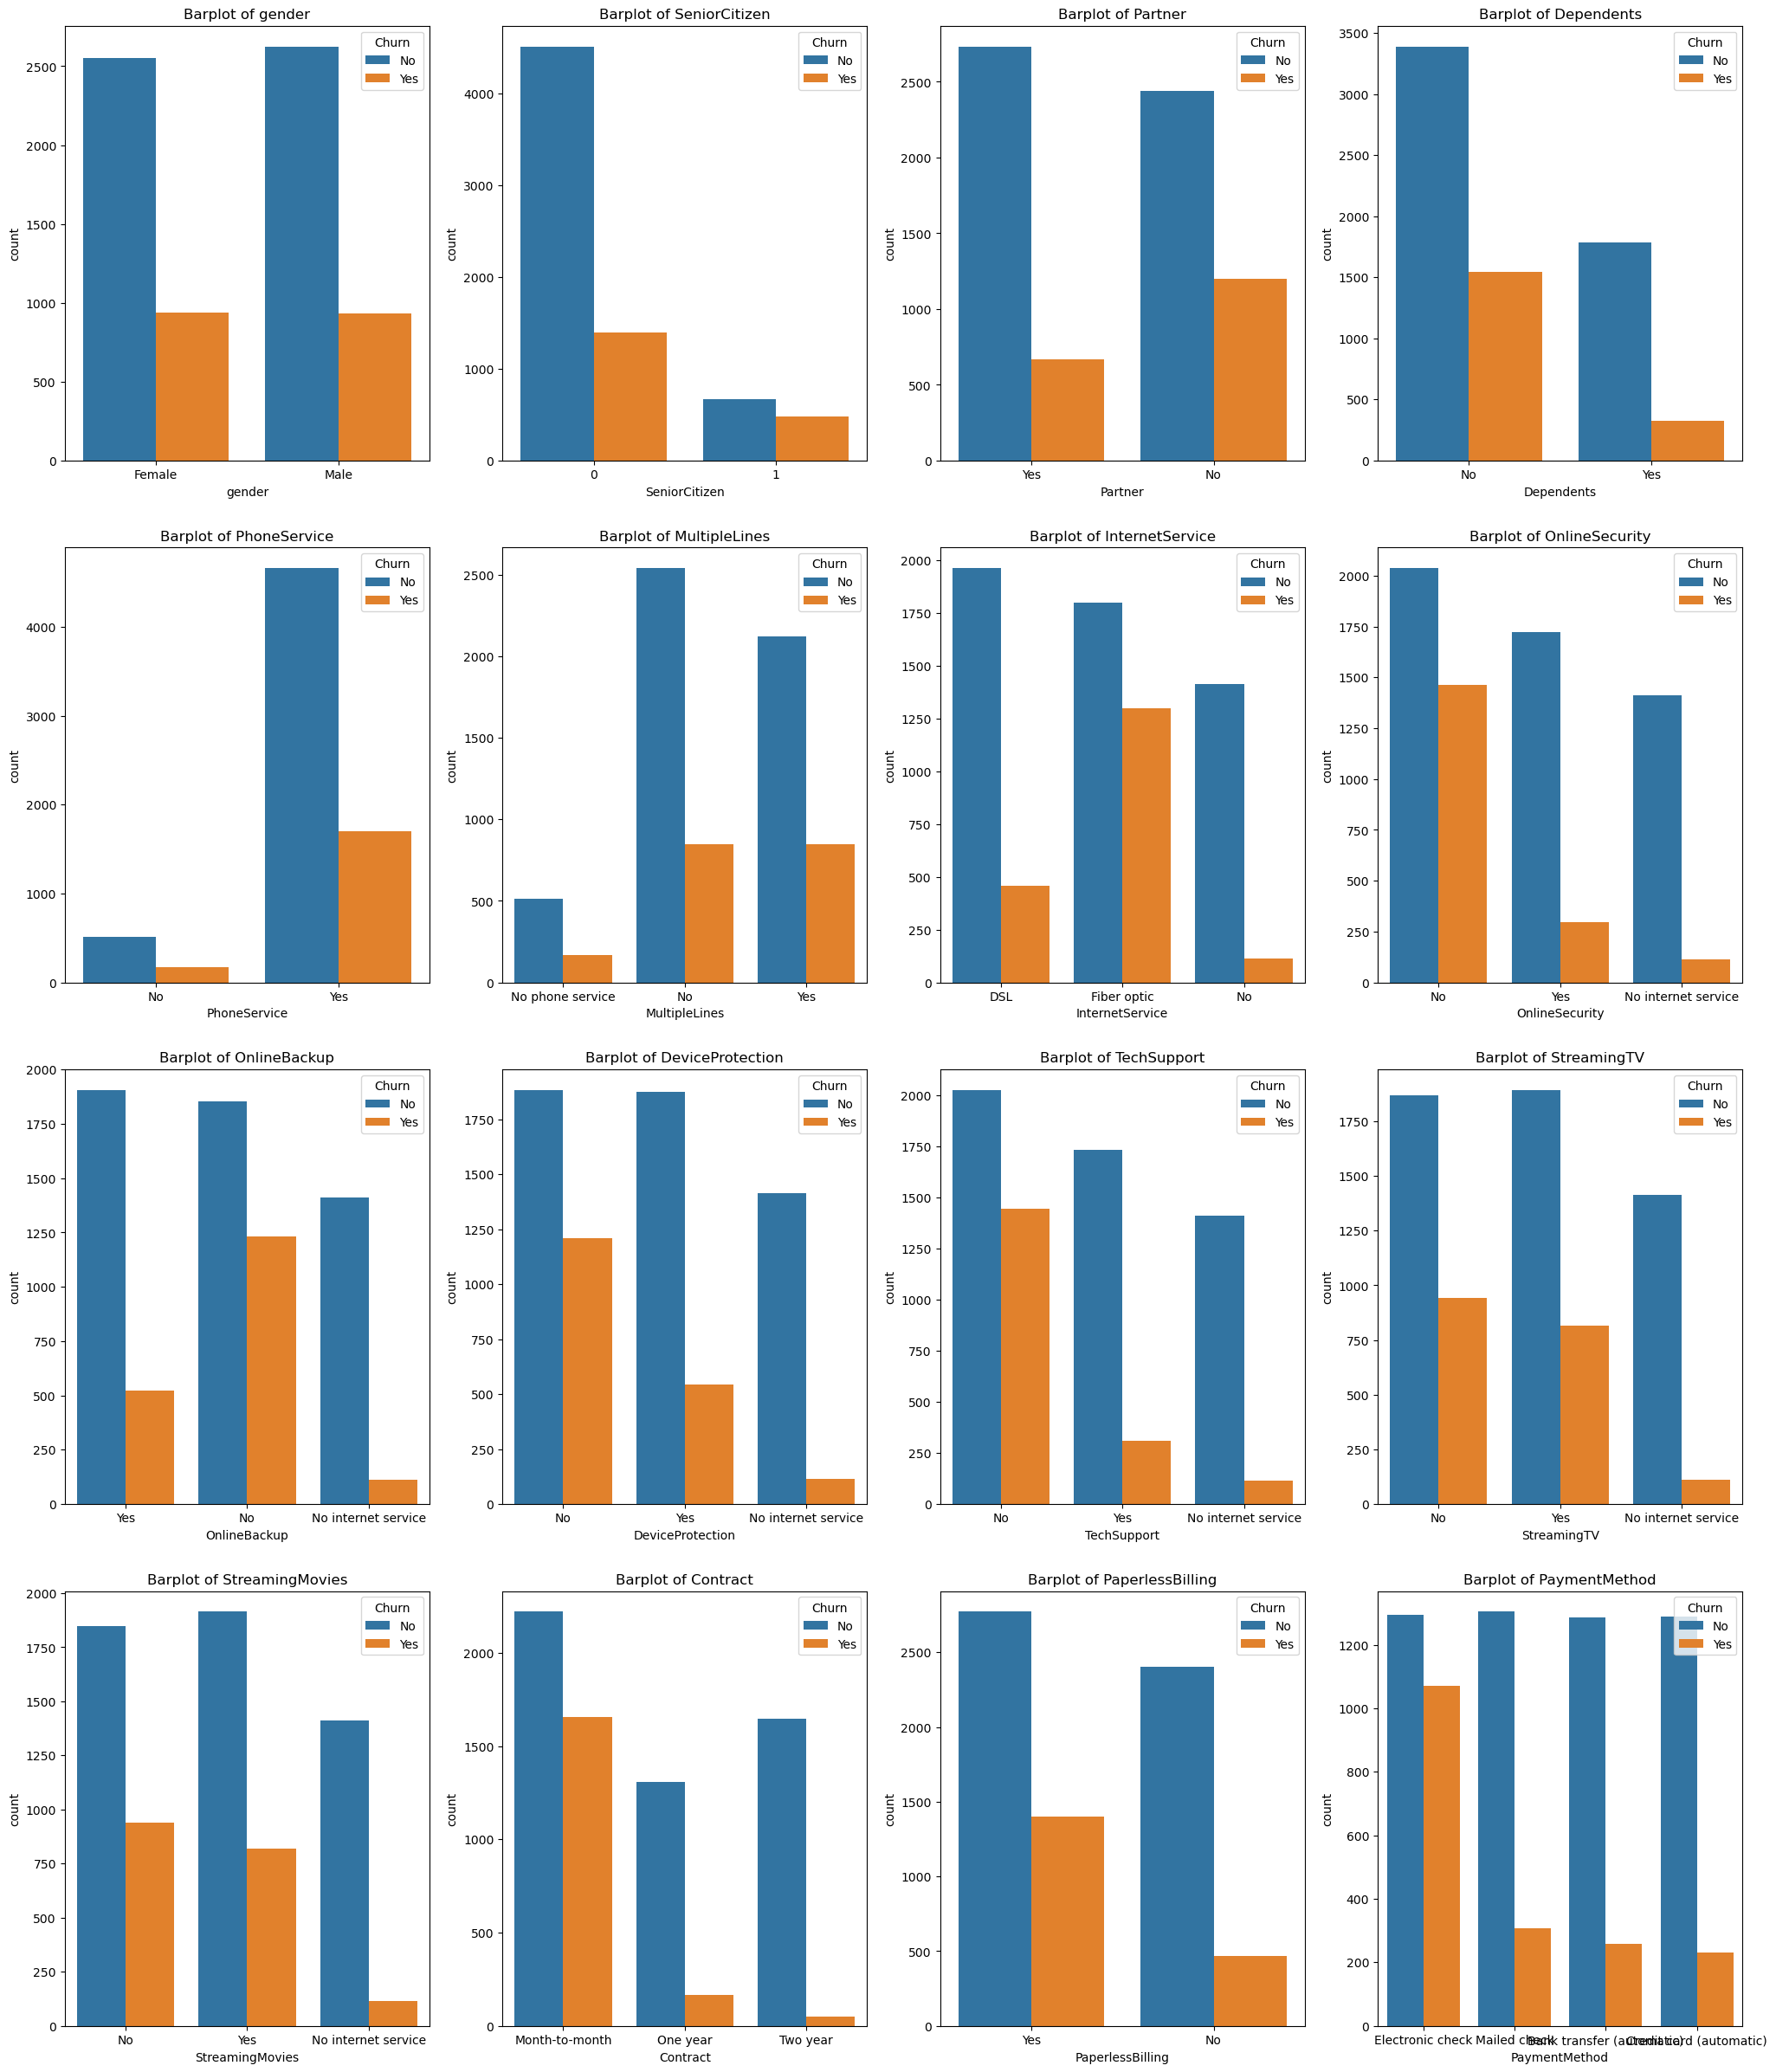

In [20]:
count=1
plt.subplots(figsize=(25,30))
for col in cat:
    plt.subplot(4,4,count)
    sns.countplot(df[col],hue=df['Churn'])
    plt.title('Barplot of '+col)
    count=count+1
plt.show()

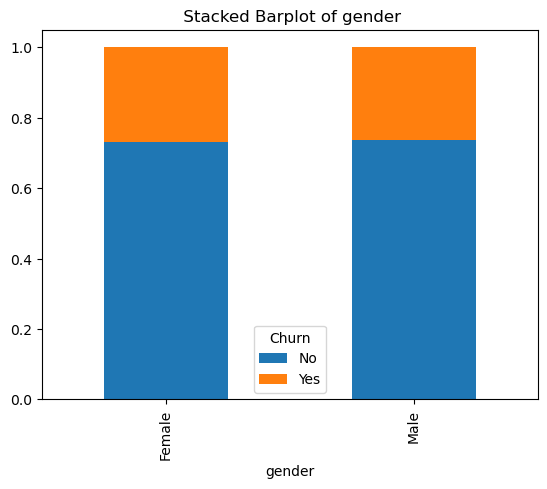

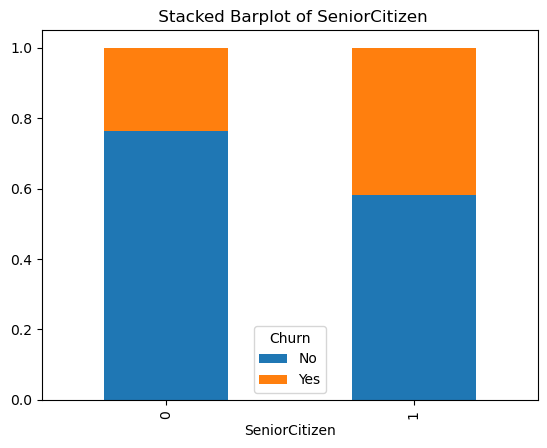

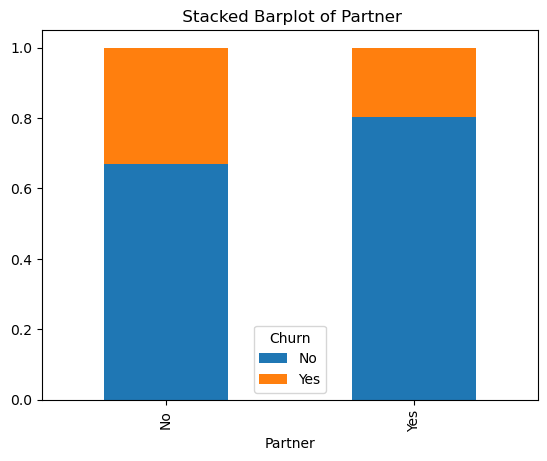

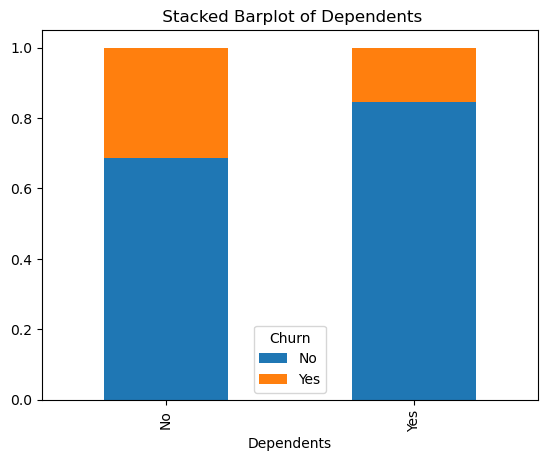

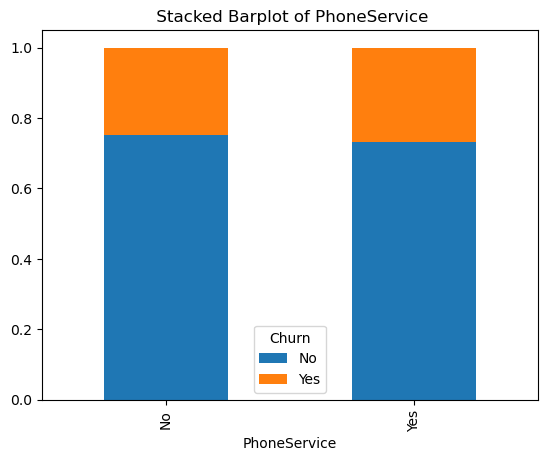

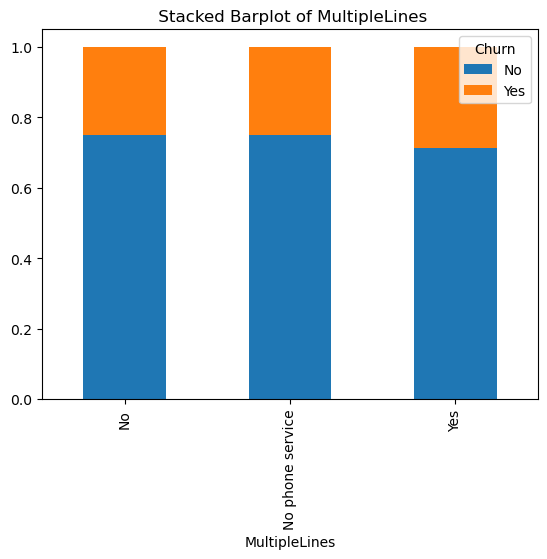

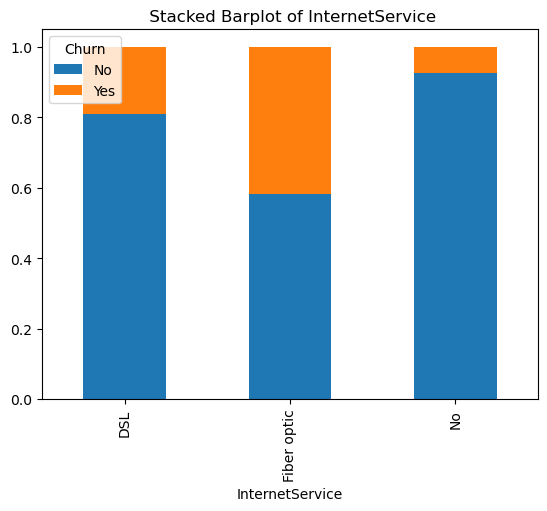

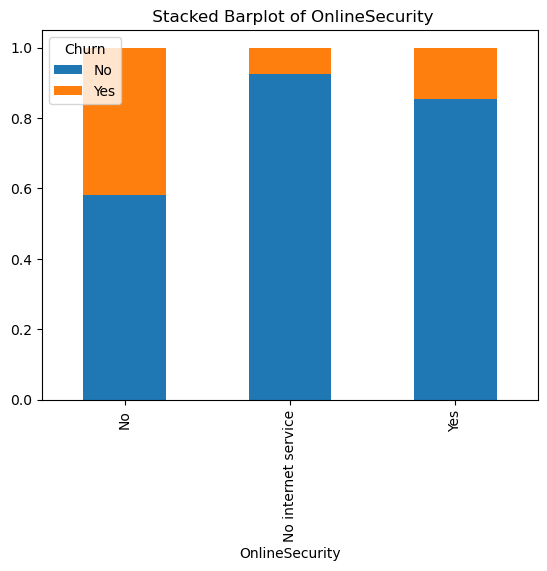

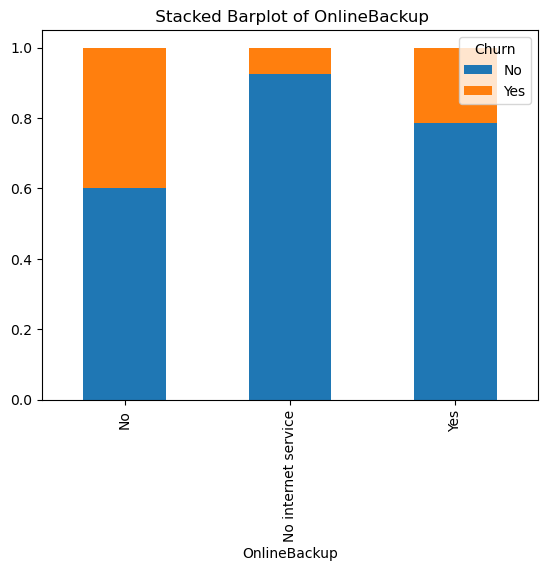

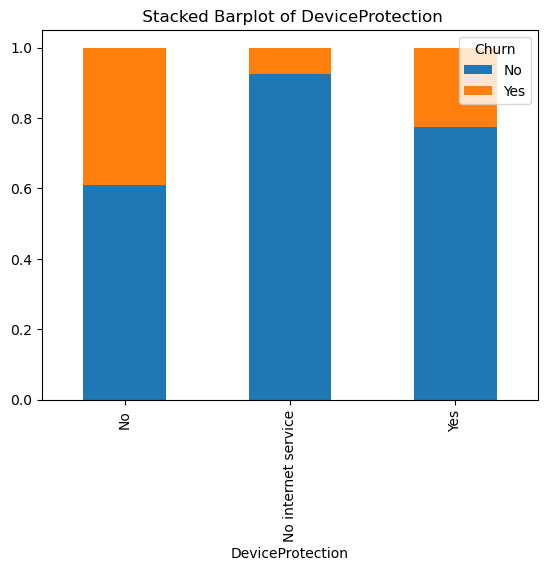

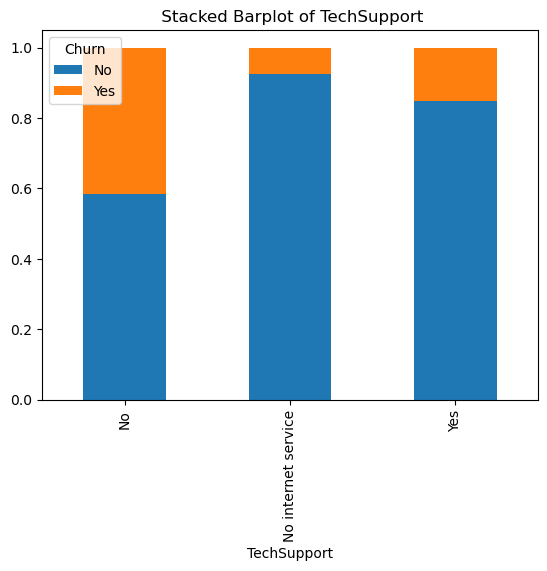

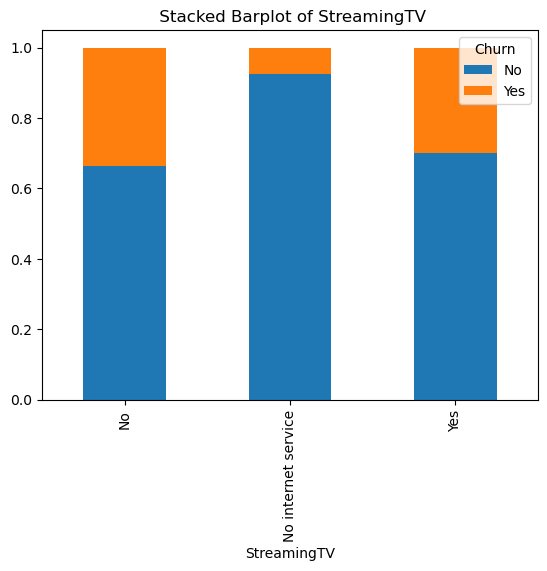

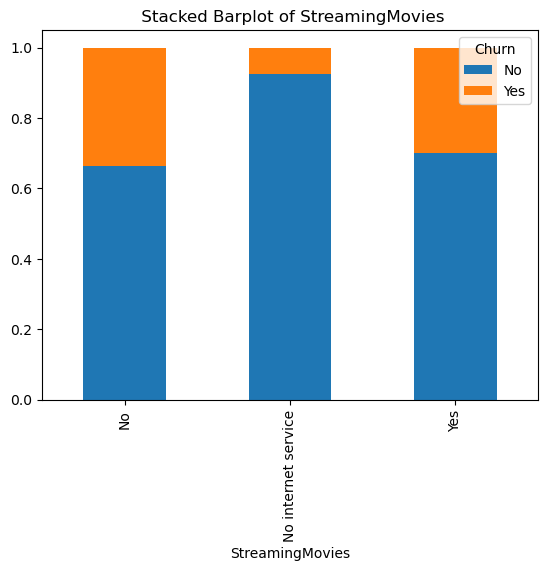

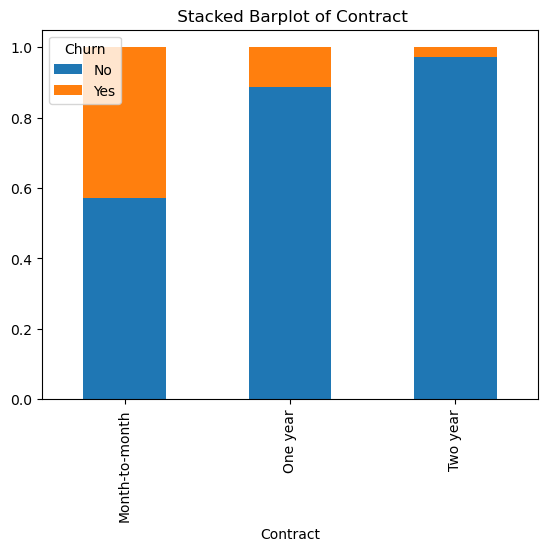

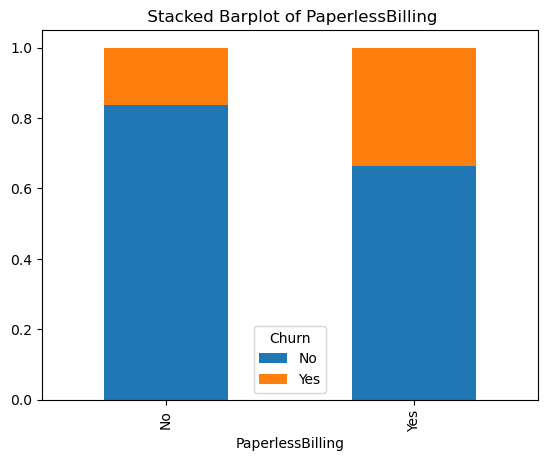

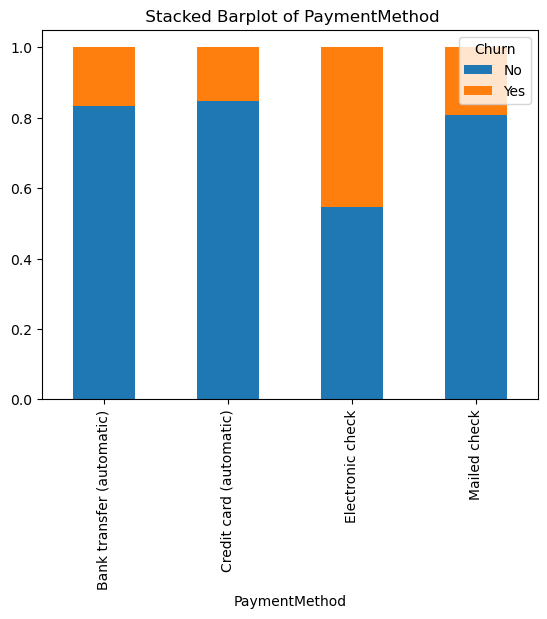

In [21]:
count=0
for col in cat:
    cross_tab_prop = pd.crosstab(index=df[col],columns=df['Churn'],normalize="index")
    cross_tab_prop.plot(kind='bar', stacked=True)
    plt.title(' Stacked Barplot of '+col)
    count=count+1
    plt.show()

- Gender, both male and female customers have approximately the same amount of those who Churn.


- The senior customers are more prone to leave the company compared to non-senior.


- Customers who don't have partner have the tedency to leave the company compared to those who don't


- Customers who leave the company have no dependents. On the other hand, those who have will not show leave that much the company


- Across the categories of PhoneService and MultipleLines, the customers show the same proportion for those who leave the company


- It is important to highlight, that the customers who use fiber optic as InternetService, will leave the company will the highest churn rate compared to other internetService methods


- Customers who don't use or don't have OnlineSecurity, OnlineBackup, OnlineProtection and TechSupport will show higher probability to Churn compared to the rest of the respective groups.


- Moreover the features StreamingMovies and StreamingTV show the same churn rate


- Customers who prefer to have PaperlessBilling will have higher Churn probability from those who don't.


- Last but not least, it should be noted that those who use ElectronicChecks for their transactions inside the company will show great tedency to leave the company than those who don't.

## Target Vs Numerical Variables

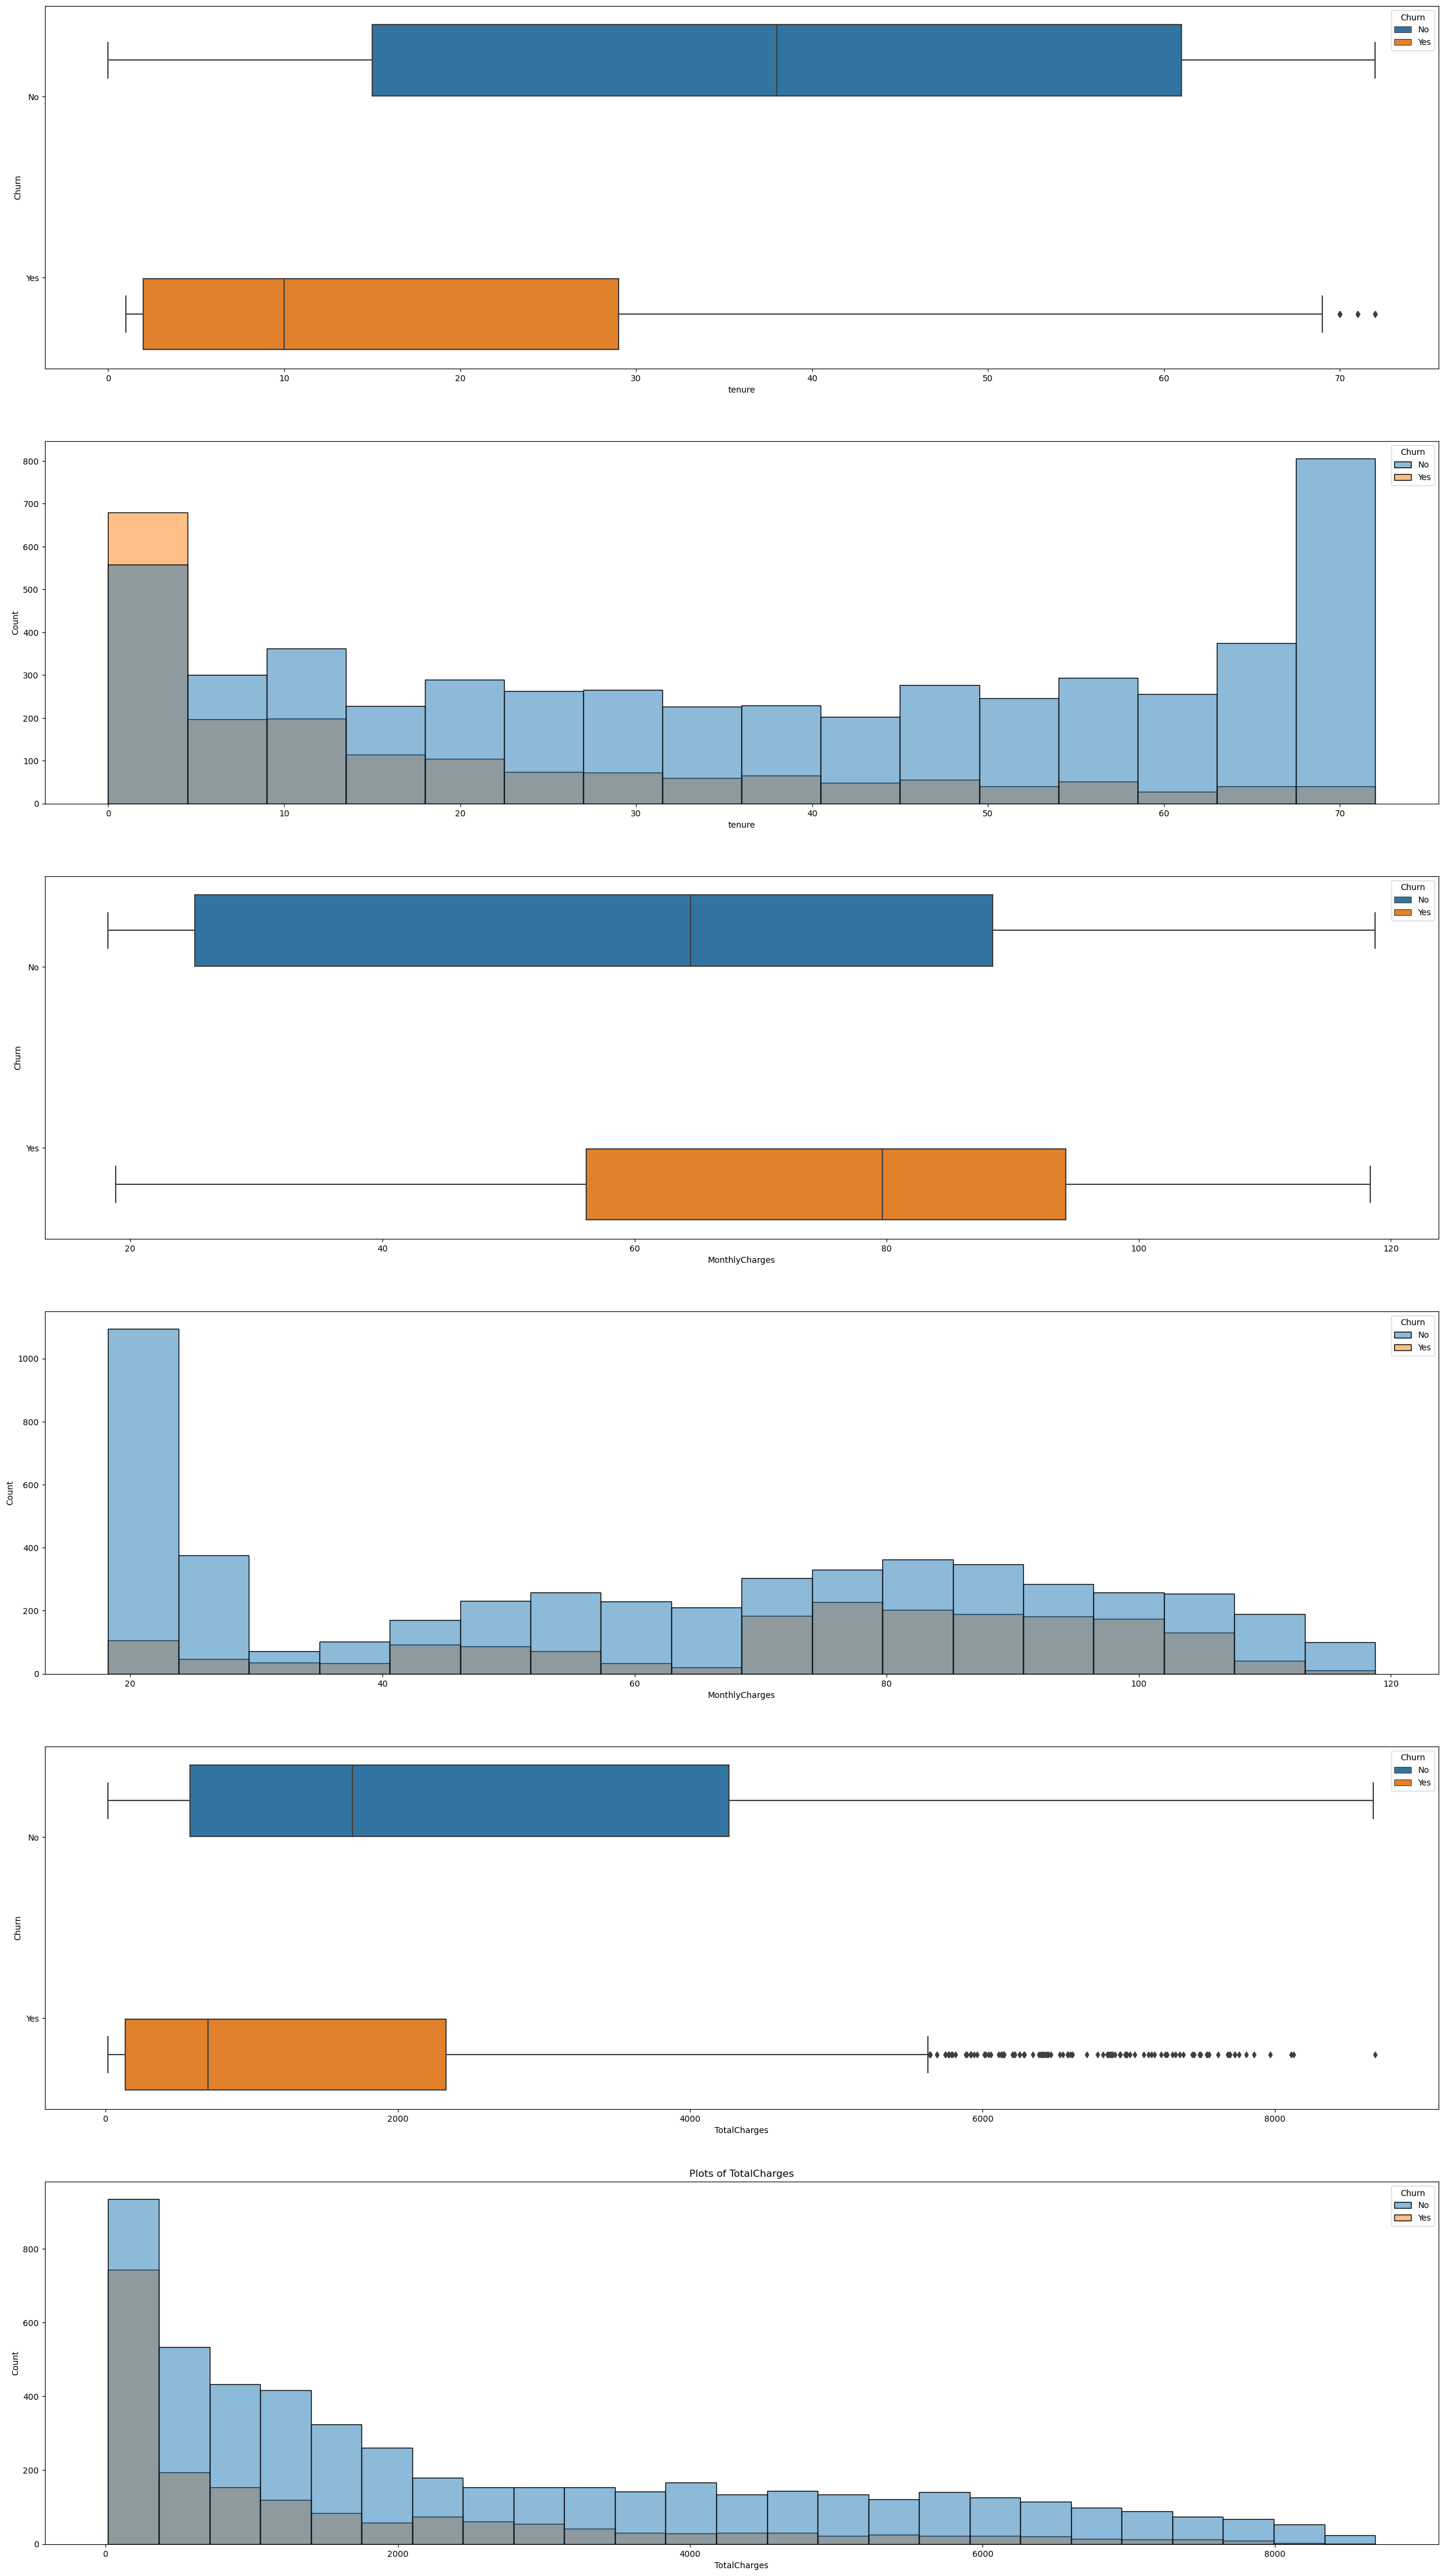

In [22]:
fig, ax = plt.subplots(6, figsize=(30, 55))
j=0
for i in num:
    plt.title("Plots of "+i)
    sns.boxplot(data=df, x=i, y="Churn", ax=ax[j], hue="Churn")
    sns.histplot(data=df, x=i, ax=ax[j+1], hue="Churn")
    j=j+2
plt.show()

- For variables tenure and TotalCharges the Churn follows the same pattern, many customers leave very early and with small total charges respectively and compared to the rest of their respective populations.


- The opposite happens with the MonthlyCharges, customers who Churn, will leave the company when the monthly charges are getting above 70 dollars.

## One-Hot Encoding of Categorical variables

In [23]:
df_dummies = pd.get_dummies(df[cat],drop_first=True)

df_dummies[['tenure', 'MonthlyCharges', 'TotalCharges']] = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

df_dummies['Churn'] = df['Churn']
df_dummies['Churn'] = df_dummies['Churn'].map({'No': 0, 'Yes': 1})
df_dummies.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,29.85,29.85,0
1,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,34,56.95,1889.50,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,2,53.85,108.15,1
3,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,45,42.30,1840.75,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,2,70.70,151.65,1


In [24]:
df_dummies1=df_dummies.copy()

## Normalization of Numerical variables

In [25]:
scaler = StandardScaler()
df_dummies[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(
    df_dummies[['tenure', 'MonthlyCharges', 'TotalCharges']])
df_dummies.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,-1.277445,-1.160323,-0.994971,0
1,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0.066327,-0.259629,-0.173876,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,-1.236724,-0.362660,-0.960399,1
3,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0.514251,-0.746535,-0.195400,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,-1.236724,0.197365,-0.941193,1


## Train-Test Split

In [26]:
X = df_dummies.drop(columns = ['Churn'])
y = df_dummies['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

## Model Construction

### 1. Logistic Regression

In [27]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7960246095598675


In [28]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1552
           1       0.62      0.58      0.60       561

    accuracy                           0.80      2113
   macro avg       0.74      0.73      0.73      2113
weighted avg       0.79      0.80      0.79      2113



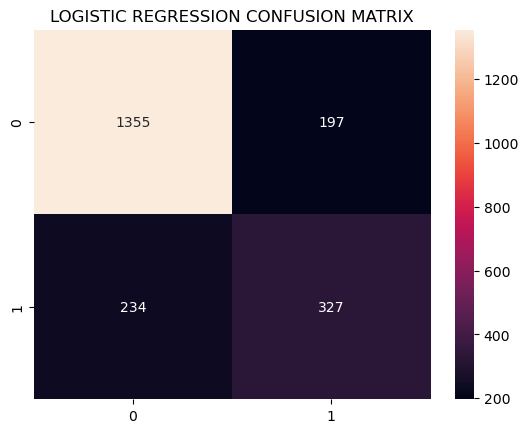

In [29]:
sns.heatmap(confusion_matrix(y_test, lr_pred),annot=True,fmt = "d")
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX")
plt.show()

### 2. Random Forest

In [30]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7983909133932797


In [31]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.66      0.50      0.57       561

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



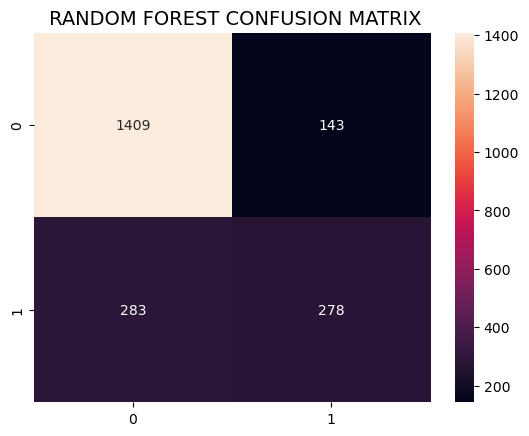

In [32]:
sns.heatmap(confusion_matrix(y_test, prediction_test),annot=True,fmt = "d")
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

### 3. SVM

In [33]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7979176526265973


In [34]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.65      0.51      0.57       561

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



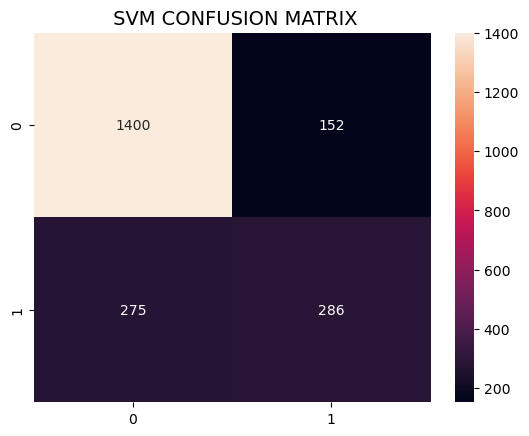

In [35]:
sns.heatmap(confusion_matrix(y_test, predict_y),annot=True,fmt = "d")
plt.title(" SVM CONFUSION MATRIX",fontsize=14)
plt.show()

### 4. Gradient Boosting

In [36]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8059630856601988


In [37]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1552
           1       0.66      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



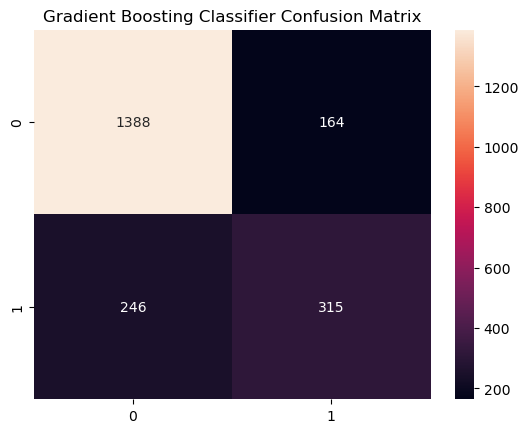

In [38]:
sns.heatmap(confusion_matrix(y_test, gb_pred),annot=True,fmt = "d")   
plt.title("Gradient Boosting Classifier Confusion Matrix")
plt.show()

### 5. XGBoost 

In [39]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("XGB Classifier", accuracy_score(y_test, xgb_pred))

XGB Classifier 0.7884524372929484


In [40]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1552
           1       0.61      0.56      0.58       561

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



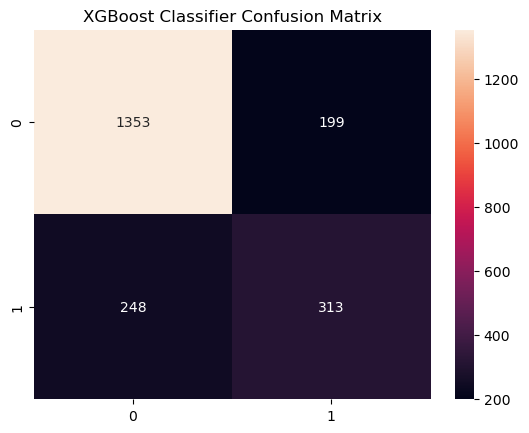

In [41]:
sns.heatmap(confusion_matrix(y_test, xgb_pred),annot=True,fmt = "d")   
plt.title("XGBoost Classifier Confusion Matrix")
plt.show()

- All the models have accuracy around 79-80%. So taking the majority voting of all the models for the prediction

### Voting Classifier

In [42]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
clf4=SVC(random_state = 1,probability=True)
clf5=XGBClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('rf', clf3), ('svm', clf4),('xgb', clf5)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8078561287269286


In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.54      0.60       561

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



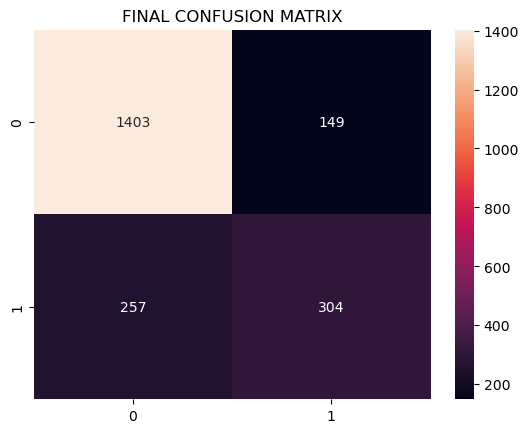

In [44]:
sns.heatmap(confusion_matrix(y_test, predictions),annot=True,fmt = "d")
plt.title("FINAL CONFUSION MATRIX")
plt.show()

## Predicting the possible revenue of customers that remain with the company

In [45]:
df3=df_dummies1[df_dummies['Churn']==0]
df3.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,29.85,29.85,0
1,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,34,56.95,1889.50,0
3,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,45,42.30,1840.75,0
6,0,1,0,1,1,0,1,1,0,0,...,0,0,1,1,0,0,22,89.10,1949.40,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,10,29.75,301.90,0


In [46]:
scaler1 = StandardScaler()
df3[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler1.fit_transform(df3[['tenure', 'MonthlyCharges', 'TotalCharges']])
df3.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,-1.516706,-1.010469,-1.085151,0
1,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,-0.148061,-0.138796,-0.285916,0
3,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0.308154,-0.610014,-0.306868,0
6,0,1,0,1,1,0,1,1,0,0,...,0,0,1,1,0,0,-0.645750,0.895310,-0.260172,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,-1.143439,-1.013686,-0.968230,0


In [47]:
df3.drop(columns=['Churn'],inplace=True)
df3.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,-1.516706,-1.010469,-1.085151
1,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,-0.148061,-0.138796,-0.285916
3,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0.308154,-0.610014,-0.306868
6,0,1,0,1,1,0,1,1,0,0,...,0,0,0,1,1,0,0,-0.645750,0.895310,-0.260172
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,-1.143439,-1.013686,-0.968230


In [48]:
X = df3.drop(columns = ['TotalCharges'])
y = df3['TotalCharges'].values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Construction

In [50]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

## 1. Linear Regression

In [51]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("-"*30)
print("R2 Score:", r_squared)
rmse_cross_val = rmse_cv(lin_reg)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.24215611255044708
MSE: 0.08929620506871422
RMSE: 0.29882470625554747
------------------------------
R2 Score: 0.9118296856634828


## 2. Ridge Regression

In [52]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("-"*30)
print("R2 Score:", r_squared)
rmse_cross_val = rmse_cv(ridge)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.24200406724159187
MSE: 0.08924512103338803
RMSE: 0.2987392191082182
------------------------------
R2 Score: 0.911880125606018


## 3. Random Forest

In [53]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("-"*30)
print("R2 Score:", r_squared)
rmse_cross_val = rmse_cv(random_forest)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.024931249724437575
MSE: 0.0013466725604976588
RMSE: 0.0366970374893895
------------------------------
R2 Score: 0.9986703069534022


## 4. XGBoost

In [54]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("-"*30)
print("R2 Score:", r_squared)
rmse_cross_val = rmse_cv(xgb)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.02392667623652318
MSE: 0.0011921876451358587
RMSE: 0.03452807039404112
------------------------------
R2 Score: 0.9988228440465208


## Model Performance Comparision

In [55]:
models.sort_values(by="R2 Score")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,0.242156,0.089296,0.298825,0.911830,0.291487
1,Ridge,0.242004,0.089245,0.298739,0.911880,0.291459
2,RandomForestRegressor,0.024931,0.001347,0.036697,0.998670,0.036823
3,XGBRegressor,0.023927,0.001192,0.034528,0.998823,0.035961


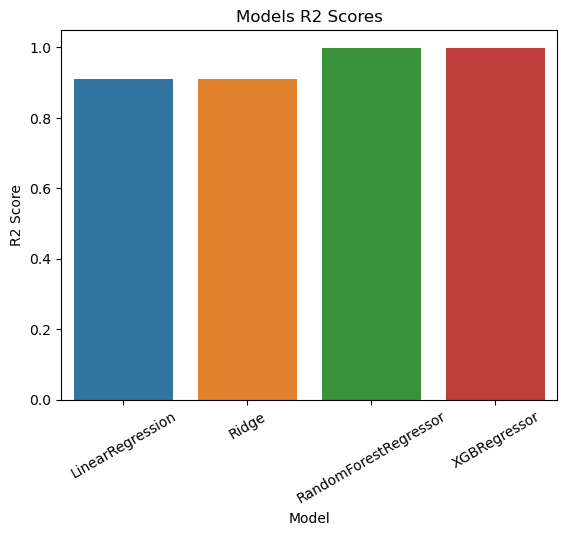

In [56]:
sns.barplot(x=models["Model"], y=models["R2 Score"])
plt.title("Models R2 Scores")
plt.xticks(rotation=30)
plt.show()

The Random Forest and XGBoost Regressor models seems to be best for predicting the revenue 